# Profiling

The performance measurements for the action-rules package were conducted using the Scalene profiler, a high-precision CPU, GPU, and memory profiler specifically designed for Python. Detailed profiling reports, which provide insights into the package's efficiency and resource usage, can be found in these directories:

* pandas cpu array (Numpy Array)
* pandas cpu sparse (SciPy Sparse M.)
* pandas gpu array (Cupy Array)
* pandas gpu sparse (Cupyx Sparse M.)

## Statistics (Average + Std Dev)
Each measurement was conducted 10 times; below, you can find the summary statistics:

In [3]:
import numpy as np

numpy_array = {
    'GPU': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'RAM': [5917, 5920, 5912, 5914, 5914, 5914, 5917, 5917, 5920, 5911],
    'Time': [21.37, 21.70, 21.84, 21.76, 21,33, 21.34, 21.75, 21.27, 21.88, 21.52]
}
scipy_sparse = {
    'GPU': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'RAM': [7150, 7147, 7146, 7150, 7148, 7139, 7147, 7149, 7149, 7156],
    'Time': [224.77, 224.02, 224.35, 223.83, 223.57, 223.52, 223.78, 223.49, 223.49, 223.32]
}
cupy_array = {
    'GPU': [9414, 9414, 9414, 9358, 9414, 9114, 9414, 9114, 9114, 9114],
    'RAM': [123, 123, 126, 123, 123, 124, 124, 125, 125, 123],
    'Time': [34.69, 6.105, 10.89, 9.97, 9.98, 9.85, 10.15, 10.04, 9.05, 12.98]
}
cupyx_sparse = {
    'GPU': [1770, 1762, 1760, 1774, 1762, 1760, 1772, 1764, 1762, 1764],
    'RAM': [127, 126, 126, 124, 125, 126, 123, 124, 125, 126],
    'Time': [44.03, 40.00, 39.20, 40.99, 38.19, 38.94, 39.05, 38.09, 38.98, 28.24]
}

# Function to calculate statistics
def calculate_stats(data):
    stats = {}
    for key, values in data.items():
        stats[key] = {
            'average': np.mean(values),
            'std_dev': np.std(values)
        }
    return stats

# Calculate and print statistics for each dataset
datasets = {
    "numpy_array": numpy_array,
    "scipy_sparse": scipy_sparse,
    "cupy_array": cupy_array,
    "cupyx_sparse": cupyx_sparse
}

for name, dataset in datasets.items():
    print(f"Statistics for {name}:")
    stats = calculate_stats(dataset)
    for key, value in stats.items():
        print(f"  {key}: Average = {value['average']:.2f}, Std Dev = {value['std_dev']:.2f}")
    print()

Statistics for numpy_array:
  GPU: Average = 0.00, Std Dev = 0.00
  RAM: Average = 5915.60, Std Dev = 2.94
  Time: Average = 22.58, Std Dev = 3.30

Statistics for scipy_sparse:
  GPU: Average = 0.00, Std Dev = 0.00
  RAM: Average = 7148.10, Std Dev = 4.01
  Time: Average = 223.81, Std Dev = 0.43

Statistics for cupy_array:
  GPU: Average = 9288.40, Std Dev = 143.31
  RAM: Average = 123.90, Std Dev = 1.04
  Time: Average = 12.37, Std Dev = 7.61

Statistics for cupyx_sparse:
  GPU: Average = 1765.00, Std Dev = 4.84
  RAM: Average = 125.20, Std Dev = 1.17
  Time: Average = 38.57, Std Dev = 3.82



## Graph with average values

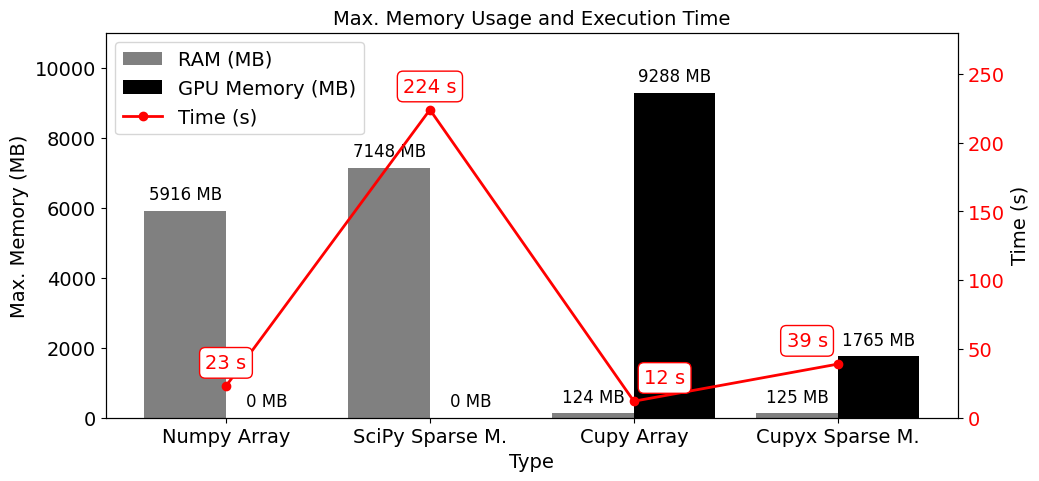

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataframe from the scalene data
data = {
    "Type": ["Numpy Array", "SciPy Sparse M.", "Cupy Array", "Cupyx Sparse M."],
    "GPU Memory (MB)": [0, 0, 9288, 1765],
    "RAM (MB)": [5916, 7148, 124, 125],
    "Time (s)": [23, 224, 12, 39]
}

df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.4
bar_positions = np.arange(len(df))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(11, 5))

# Plot RAM and GPU Memory as separate bars
ram_bars = ax1.bar(bar_positions - bar_width/2, df["RAM (MB)"], bar_width, color='gray', label='RAM (MB)')
gpu_bars = ax1.bar(bar_positions + bar_width/2, df["GPU Memory (MB)"], bar_width, color='black', label='GPU Memory (MB)')

ax1.set_ylabel('Max. Memory (MB)', fontsize=14)
ax1.set_xlabel('Type', fontsize=14)
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(df["Type"], fontsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Set the y-axis limit for memory
ax1.set_ylim(0, 11000)

# Add text annotations for Memory values
for i in range(len(df)):
    ax1.text(bar_positions[i] - bar_width/2, df["RAM (MB)"][i] + 200, f'{df["RAM (MB)"][i]} MB', ha='center', va='bottom', color='black', fontsize=12)
    ax1.text(bar_positions[i] + bar_width/2, df["GPU Memory (MB)"][i] + 200, f'{df["GPU Memory (MB)"][i]} MB', ha='center', va='bottom', color='black', fontsize=12)

# Create another y-axis for Time
ax2 = ax1.twinx()
time_line = ax2.plot(bar_positions, df["Time (s)"], color='red', marker='o', linestyle='-', linewidth=2, label='Time (s)')
ax2.set_ylabel('Time (s)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=14)

# Set the y-axis limit for time
ax2.set_ylim(0, 280)

# Add text annotations for Time values with padding and white box with red border
for i, time in enumerate(df["Time (s)"]):
    if i == 2:
        ha = 'left'
        dx = 0.050
    elif i == 3:
        ha = 'right'
        dx = -0.050
    else:
        ha = 'center'
        dx = 0
    
    ax2.text(bar_positions[i] + dx, time + 10, f'{time} s', ha=ha, va='bottom', color='red', fontsize=14, 
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

# Add legend for the second y-axis
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=14)

# Save the plot
plt.title("Max. Memory Usage and Execution Time", fontsize=14)
plt.savefig("memory_and_time.png", format='png', dpi=300)
plt.show()

## Graph with average values and std dev

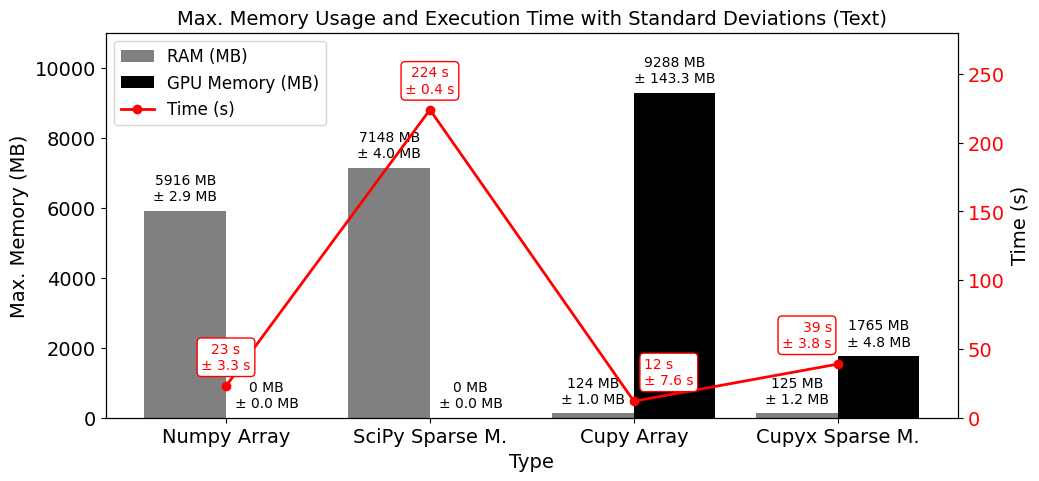

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataframe with average and standard deviation values
data = {
    "Type": ["Numpy Array", "SciPy Sparse M.", "Cupy Array", "Cupyx Sparse M."],
    "GPU Memory (MB)": [0, 0, 9288, 1765],
    "GPU Std Dev": [0, 0, 143.3, 4.8],  # Example standard deviations for GPU memory
    "RAM (MB)": [5916, 7148, 124, 125],
    "RAM Std Dev": [2.9, 4.0, 1.0, 1.2],  # Example standard deviations for RAM
    "Time (s)": [23, 224, 12, 39],
    "Time Std Dev": [3.3, 0.4, 7.6, 3.8]  # Example standard deviations for Time
}

df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.4
bar_positions = np.arange(len(df))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(11, 5))

# Plot RAM and GPU Memory as separate bars
ram_bars = ax1.bar(bar_positions - bar_width/2, df["RAM (MB)"], bar_width, color='gray', label='RAM (MB)')
gpu_bars = ax1.bar(bar_positions + bar_width/2, df["GPU Memory (MB)"], bar_width, color='black', label='GPU Memory (MB)')

ax1.set_ylabel('Max. Memory (MB)', fontsize=14)
ax1.set_xlabel('Type', fontsize=14)
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(df["Type"], fontsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_ylim(0, 11000)

# Add text annotations for Memory values and standard deviations
for i in range(len(df)):
    ax1.text(bar_positions[i] - bar_width/2, df["RAM (MB)"][i] + 200, f'{df["RAM (MB)"][i]} MB\n± {df["RAM Std Dev"][i]} MB', ha='center', va='bottom', color='black', fontsize=10)
    ax1.text(bar_positions[i] + bar_width/2, df["GPU Memory (MB)"][i] + 200, f'{df["GPU Memory (MB)"][i]} MB\n± {df["GPU Std Dev"][i]} MB', ha='center', va='bottom', color='black', fontsize=10)

# Create another y-axis for Time
ax2 = ax1.twinx()
time_line = ax2.plot(bar_positions, df["Time (s)"], color='red', marker='o', linestyle='-', linewidth=2, label='Time (s)')
ax2.set_ylabel('Time (s)', fontsize=14)
ax2.tick_params(axis='y', labelcolor='red', labelsize=14)
ax2.set_ylim(0, 280)

# Add text annotations for Time values with standard deviations
for i, time in enumerate(df["Time (s)"]):
    ha = 'center' if i not in [2, 3] else 'left' if i == 2 else 'right'
    #dx = 0.050 if i in [2, 3] else 0
    dx = 0.050 if i == 2 else -0.03 if i == 3 else 0 
    ax2.text(bar_positions[i] + dx, time + 10, f'{time} s\n± {df["Time Std Dev"][i]} s', ha=ha, va='bottom', color='red', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3'))

# Add legend for both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Save and show the plot
plt.title("Max. Memory Usage and Execution Time with Standard Deviations", fontsize=14)
plt.savefig("memory_and_time_with_std.png", format='png', dpi=300)
plt.show()